# Artificial Neural Networks - Customer Churn

In [72]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
tf.__version__

'2.3.0'

## Step 1 - Data Preprocessing

### Import dataset

In [27]:
raw_data = pd.read_csv('Churn_Modelling.csv')
X = raw_data.iloc[:,3:-1].values
y = raw_data.iloc[:,-1].values

In [29]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [30]:
X.shape

(10000, 10)

In [31]:
type(X)

numpy.ndarray

In [33]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [34]:
y.shape

(10000,)

In [35]:
type(y)

numpy.ndarray

### Checking for missing values

In [38]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**We don't have any missing values**

In [24]:
# If your dataset have any missing values then we can remove them using imputer in sklearn package
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(missing_values=np.nan,strategy="mean")
#imputer.fit(X[:,1:3])
#X[:,1:3] = imputer.transform()

### Encoding Categorical Data

In [39]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**We can see that Geography and Gender are categorical in nature, So we will encode them**

#### For gender we will use label encoders

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(X[:,2])
X[:,2] = le.transform(X[:,2])

In [43]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


We have succesfully encoded female into 0 and Male to 1

#### One-hot Encoding for Geography Column 

In [50]:
raw_data.Geography

0        France
1         Spain
2        France
3        France
4         Spain
         ...   
9995     France
9996     France
9997     France
9998    Germany
9999     France
Name: Geography, Length: 10000, dtype: object

In [49]:
raw_data.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

**Note: We have three different Geographic location so we will get three different columns when we One-hot encode 'Geography' column**

In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [47]:
print(X.shape)

(10000, 12)


We can see that 'France' was encoded into '100', "Germany" into '010' and 'Spain' into '001'

### Split dataset into training and testing

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

### Feature Scaling

In [56]:
# We scale all features irrespective of their data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

**End of Data Preprocessing**

--- 

## Step 2 - Building a ANN

### Intialize the ANN as sequence of layers

In [58]:
ann = tf.keras.models.Sequential()

### Adding the input layer and first hidden layer

In [59]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu')) # To add a layer to NN

### Adding the second hidden layer

In [60]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

### Adding the output layer


In [61]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

## Step 3 - Training the ANN 

### Compiling the ANN

In [62]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### Training the ANN

In [63]:
ann.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
250/250 [==============================] - 0s 962us/step - loss: 0.5484 - accuracy: 0.7933
Epoch 2/100
250/250 [==============================] - 0s 985us/step - loss: 0.4843 - accuracy: 0.7961
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4576 - accuracy: 0.7979
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4424 - accuracy: 0.8040
Epoch 5/100
250/250 [==============================] - 0s 946us/step - loss: 0.4318 - accuracy: 0.8069
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4225 - accuracy: 0.8085
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4127 - accuracy: 0.8116
Epoch 8/100
250/250 [==============================] - 0s 950us/step - loss: 0.4013 - accuracy: 0.8154
Epoch 9/100
250/250 [==============================] - 0s 978us/step - loss: 0.3915 - accuracy: 0.8250
Epoch 10/100
250/250 [==============================] - 0s 974us/step - loss: 0.3

## Part 4 - Making the predictions 

In [65]:
# For single test case
result = ann.predict(sc.transform([[1,0,0,600,1,40,3,60000,2,1,1,50000]]))
print(result > 0.5)

[[False]]


**Result is false so customer will not leave the bank**

**Important note 1**: Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results


In [69]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(y_pred)
print()
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


## Step 5 - Evaluating the model

#### Making Confusion Matrix

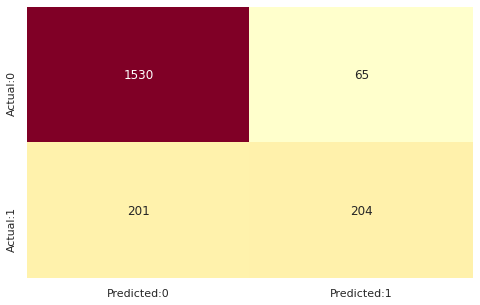

In [75]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)

conf_matrix = pd.DataFrame(data=cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='YlOrRd',cbar=False)
plt.show()
#accuracy_score(y_test,y_pred)

Classification Report

In [78]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.76      0.50      0.61       405

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



ROC Curve

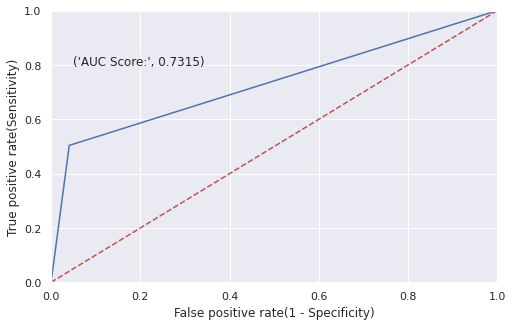

In [82]:
from sklearn.metrics import roc_curve, roc_auc_score
plt.rcParams['figure.figsize'] = (8,5)

fpr, tpr, thresholds = roc_curve(y_test,y_pred)

# plot the roc curve
plt.plot(fpr,tpr,'b-')

# Set limits
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

# Plot a 45 deg line
plt.plot([0,1],[0,1],'r--')

# Add auc score
plt.text(x = 0.05, y = 0.8, s= ('AUC Score:', round(roc_auc_score(y_test,y_pred),4)))

# name of plot and axes
plt.xlabel('False positive rate(1 - Specificity)')
plt.ylabel('True positive rate(Sensitivity)')

# Plot grid
#plt.grid(True)
plt.show()

The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)

## Step 6 - Tabulate the result

In [90]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
cols = ['Model','AUC Score','Precision Score','Recall Score','Accuracy Score','f1-score']

result_tabulation = pd.DataFrame(columns = cols)

model_metrices = pd.Series({'Model' : 'ANN',
                            "AUC Score" : roc_auc_score(y_test,y_pred),
                            "Precision Score" : precision_score(y_test,y_pred),
                            "Recall Score" : recall_score(y_test,y_pred),
                            "Accuracy Score" : accuracy_score(y_test,y_pred),
                            "f1-score" : f1_score(y_test,y_pred)})
result_tabulation = result_tabulation.append(model_metrices,ignore_index=True)

result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,ANN,0.731476,0.758364,0.503704,0.867,0.605341
